<a href="https://www.kaggle.com/code/mennatullaheisawy/brain-tumor-cnn-classification-test-acc-95?scriptVersionId=188252498" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Brain Tumor MRI Classification Notebook

## Notebook Description and Summary

This notebook is dedicated to the classification of brain tumors using MRI images. We aim to leverage deep learning techniques, specifically Convolutional Neural Networks (CNNs), to accurately classify 16 different types of brain tumors. This project is crucial as early detection and accurate classification of brain tumors can significantly impact patient outcomes and treatment strategies.

### Workflow Outline:

1. **Importing Essential Libraries**
    - We begin by importing the necessary libraries for data manipulation, visualization, and building deep learning models.
    
2. **Data Preparation**
    - **Helper Function:** A function to read images from various folders and store them in DataFrames.
    - **Sample Visualization:** Displaying sample images from the training and testing sets along with their labels for a better understanding of the dataset.

3. **Data Augmentation and Generators**
    - Generating data generators for the training and testing datasets to enhance model generalization and handle overfitting.

4. **Model Building**
    - Constructing four different model architectures with varying hyperparameters to address underfitting and overfitting.
    - Each model is designed with unique configurations of convolutional layers, dense layers, dropout rates, and learning rates.

5. **Training and Evaluation**
    - **Helper Function for Plotting:** A function to plot training history, including accuracy and loss over epochs, to visualize model performance.
    - Training each model and evaluating its performance on the test set.

6. **Model Comparison**
    - Creating a comprehensive DataFrame to store key metrics of each model, such as training loss, test loss, training accuracy, and test accuracy.
    - This comparison helps in selecting the best-performing model for future predictions.

### Dataset Overview

The Brain Tumor MRI Dataset comprises images from three different sources: figshare, SARTAJ dataset, and Br35H. It includes a total of 7023 images categorized into four classes: glioma, meningioma, no tumor, and pituitary. The dataset emphasizes the need for resizing images after pre-processing to ensure consistent model input and improved accuracy.

**Important Note:** The no tumor class images are sourced from the Br35H dataset. Additionally, images in the glioma class have been re-evaluated to ensure proper categorization, enhancing the dataset's reliability.

### Project Goals

- **Early Detection:** Utilizing MRI images to identify and classify brain tumors at an early stage.
- **Accurate Classification:** Differentiating between 16 types of brain tumors with high precision.
- **Improved Treatment:** Providing insights that can help in selecting the most appropriate treatment method, potentially saving lives.

### Key Highlights

- The notebook demonstrates a structured approach to tackle a critical problem in medical imaging.
- Various deep learning models are trained and compared to find the optimal solution.
- The final model will aid in the accurate classification of brain tumors, contributing to the medical field.

### Call to Action

If you find this notebook helpful or have any suggestions, please feel free to upvote and share your thoughts. Your feedback is highly appreciated and will help in improving this work. Thank you! 😉



### This is the summary dataframe for all the tried models with different hyperparameters 

        --> please do not run the below cell because this dataframe is defined later down
        --> This is just for showing the results

In [57]:
(models_details)

,Model_Name,no_of_conv_layers,max_no_of_filters,no_of_dense_layers,no_of_neurons_at_first_dense,drop_out,learning_rate,epochs,tr_loss,test_loss,tr_acc,test_acc
0,model,1,10,2,16,0.2,0.0010,20,0.461286,0.799728,0.853116,0.794050
1,model2,1,10,2,16,0.2,0.0001,30,0.002397,0.334240,0.999825,0.950420
2,model3,1,5,2,16,0.4,0.0001,30,0.020767,0.289276,0.992647,0.919908
3,model4 with padding,1,10,2,16,0.5,0.0001,40,0.085555,0.300646,0.995973,0.942029


## Import Libraries

In [21]:
import os
import cv2
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Read the dataset

#### Define function to read data from folders to a dataframe

In [2]:
def read_data_from_directory(path):
    filepaths, labels = [],[]
    folders = os.listdir(path)
    for folder in folders:
        folderpath= os.path.join(path, folder)
        files = os.listdir(folderpath)
        for file in files:
            filepath= os.path.join(folderpath, file)
            filepaths.append(filepath)
            labels.append(folder)
    data_df = pd.DataFrame(data={'file_paths':filepaths, 'labels':labels})
    return data_df

In [3]:
train_path = '/kaggle/input/brain-tumor-mri-dataset/Training'
test_path = '/kaggle/input/brain-tumor-mri-dataset/Testing'

#### make the train dataframe

In [4]:
train_df = read_data_from_directory(train_path)
train_df.sample(5)

,file_paths,labels
4616,/kaggle/input/brain-tumor-mri-dataset/Training...,glioma
5049,/kaggle/input/brain-tumor-mri-dataset/Training...,glioma
2758,/kaggle/input/brain-tumor-mri-dataset/Training...,notumor
2548,/kaggle/input/brain-tumor-mri-dataset/Training...,notumor
4861,/kaggle/input/brain-tumor-mri-dataset/Training...,glioma


#### make the test dataframe

In [5]:
test_df = read_data_from_directory(test_path)
test_df.sample(5)

,file_paths,labels
572,/kaggle/input/brain-tumor-mri-dataset/Testing/...,notumor
254,/kaggle/input/brain-tumor-mri-dataset/Testing/...,pituitary
947,/kaggle/input/brain-tumor-mri-dataset/Testing/...,meningioma
809,/kaggle/input/brain-tumor-mri-dataset/Testing/...,meningioma
757,/kaggle/input/brain-tumor-mri-dataset/Testing/...,meningioma


#### Show sample images from train and test images

In [18]:
def plot_sample_images(df, n):
    c = 3
    r = math.ceil(n/c)
    data = df.sample(n)
    paths= list(data['file_paths'])
    labels = list(data['labels'])
    plt.figure(figsize=(7,7))
    for i in range(len(paths)):
        img= cv2.imread(paths[i])
        plt.subplot(r,c,i+1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(labels[i])
        plt.axis('off')

    plt.tight_layout()
    plt.show()

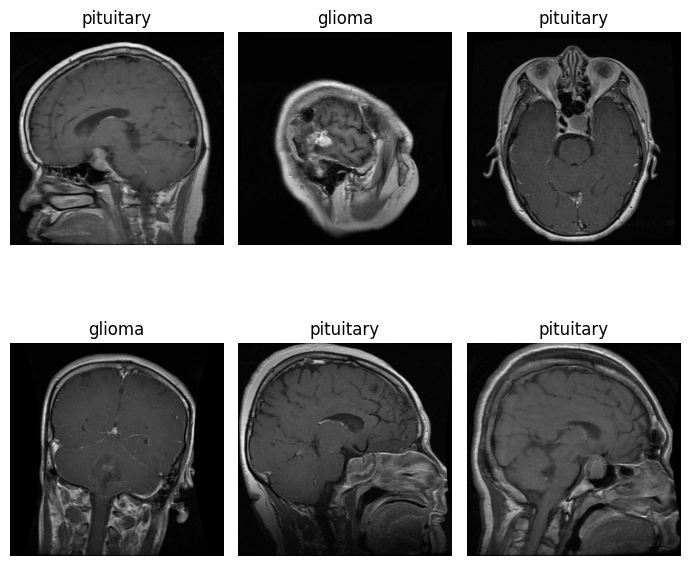

In [22]:
# plotting the training sample
n=6
plot_sample_images(train_df, n)

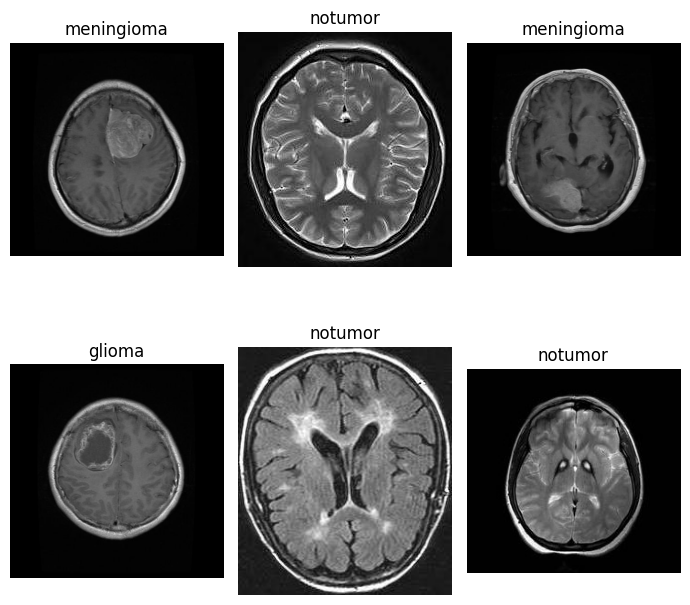

In [23]:
# plotting the test sample
plot_sample_images(test_df, n)

### Prepare the data generators

In [25]:
target_size=(224, 224)
color_mode = 'rgb'
class_mode = 'categorical'
x_col='file_paths'
y_col= 'labels'

gen = ImageDataGenerator(rescale=1./255)

train_gen = gen.flow_from_dataframe(train_df, x_col=x_col, y_col= y_col,
                                   target_size=target_size, color_mode=color_mode,
                                   class_mode=class_mode, batch_size=16, shuffle=True)

test_gen = gen.flow_from_dataframe(test_df, x_col=x_col, y_col= y_col,
                                   target_size=target_size, color_mode=color_mode,
                                   class_mode=class_mode, batch_size=8, shuffle=False)


Found 5712 validated image filenames belonging to 4 classes.
Found 1311 validated image filenames belonging to 4 classes.


## Build The model Archeticture

In [26]:
model = Sequential([
    Conv2D(10, kernel_size=(3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D((2,2)),
    
    Flatten(),
    BatchNormalization(),
    
    Dense(16, activation='relu'),
    Dropout(0.2),
    
    Dense(8, activation='relu'),
    Dense(4, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 123210)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 123210)         │       492,840 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │     1,971,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            36 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,464,668 (9.40 MB)

 Trainable params: 2,218,248 (8.46 MB)

 Non-trainable params: 246,420 (962.58 KB)

In [27]:
history = model.fit(train_gen, epochs=20, validation_data=test_gen, verbose=0)

/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-07-14 15:15:59.794563: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 7: 7.16255, expected 6.24592
2024-07-14 15:15:59.794614: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 9: 7.62902, expected 6.71239
2024-07-14 15:15:59.794629: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 10: 7.42795, expected 6.51132
2024-07-14 15:15:59.794648: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 11: 5.74732, expected 4.8307
2024-07-14 15:15:59.794659: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1

### Define functions to Plot Losses and Accuracies

In [31]:
def plot_accuracy(history):
    # Define needed variables
    tr_accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    index_acc = np.argmax(val_accuracy)
    val_highest = val_accuracy[index_acc]

    Epochs = [i+1 for i in range(len(tr_accuracy))]
    accuracy_label = f'best epoch= {str(index_acc + 1)}'

    # Plot training history
    plt.figure(figsize= (8, 3))
    plt.style.use('fivethirtyeight')

    plt.plot(Epochs, tr_accuracy, 'r', label= 'Training Accuracy')
    plt.plot(Epochs, val_accuracy, 'g', label= 'Validation Accuracy')
    plt.scatter(index_acc + 1, val_highest, s= 150, c= 'blue', label= accuracy_label)
    plt.title('Training and Validation Accuracy', fontsize=14)
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout
    plt.show()
    
def plot_loss(history):
    # Define needed variables
    tr_loss = history.history['loss']
    val_loss = history.history['val_loss']
    index_loss = np.argmin(val_loss)
    val_lowest = val_loss[index_loss]

    Epochs = [i+1 for i in range(len(tr_loss))]
    loss_label = f'best epoch= {str(index_loss + 1)}'

    # Plot training history
    plt.figure(figsize= (8, 3))
    plt.style.use('fivethirtyeight')

    plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
    plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
    plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
    plt.title('Training and Validation Loss', fontsize=14)
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout
    plt.show()
    
def plot_loss_and_accuracy(history):
    plot_loss(history)    
    plot_accuracy(history)

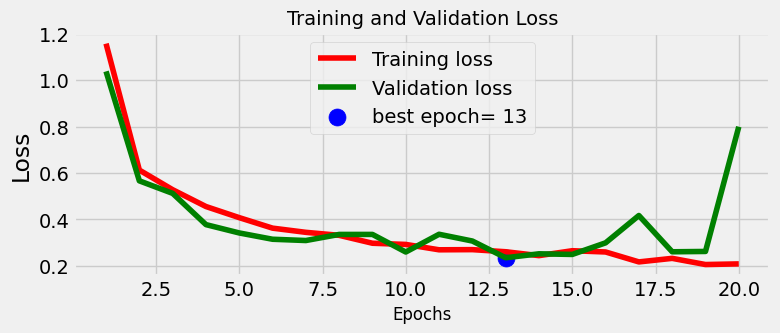

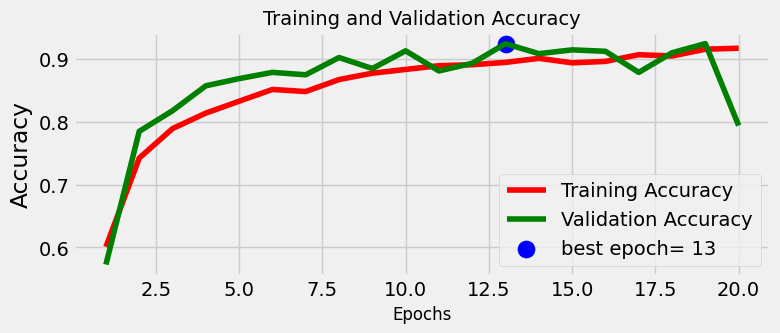

In [32]:
plot_loss_and_accuracy(history)

#### Define a DataFrame to save the model hyperparams, accuracies, and losses in a dataframe

    - So that we can compare between at the end. 

In [47]:
tr_eval = model.evaluate(train_gen)
tr_loss = tr_eval[0]
tr_acc = tr_eval[1]

test_eval = model.evaluate(test_gen)
test_loss = test_eval[0]
test_acc = test_eval[1]

models_details = pd.DataFrame(data={'Model_Name':['model'], 
                                    'no_of_conv_layers':[1], 
                                    'max_no_of_filters':[10],
                                    'no_of_dense_layers':[2], 
                                    'no_of_neurons_at_first_dense':[16], 
                                    'drop_out':[0.2],
                                    'learning_rate':[0.001], 
                                    'epochs':[20], 
                                    'tr_loss':[tr_loss], 
                                    'test_loss':[test_loss],
                                    'tr_acc':[tr_acc],
                                    'test_acc':[test_acc]})

models_details

357/357 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - accuracy: 0.8385 - loss: 0.5097
164/164 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.8623 - loss: 0.4950


,Model_Name,no_of_conv_layers,max_no_of_filters,no_of_dense_layers,no_of_neurons_at_first_dense,drop_out,learning_rate,epochs,tr_loss,test_loss,tr_acc,test_acc
0,model,1,10,2,16,0.2,0.001,20,0.461286,0.799728,0.853116,0.79405


In [33]:
model2 = Sequential([
    Conv2D(10, kernel_size=(3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D((2,2)),
    
    Flatten(),
    BatchNormalization(),
    
    Dense(16, activation='relu'),
    Dropout(0.2),
    
    Dense(8, activation='relu'),
    Dense(4, activation='softmax')
])

model2.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
model2.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 111, 111, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 123210)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 123210)         │       492,840 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │     1,971,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 4)              │            36 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,464,668 (9.40 MB)

 Trainable params: 2,218,248 (8.46 MB)

 Non-trainable params: 246,420 (962.58 KB)

In [34]:
history2 = model2.fit(train_gen, epochs=30, validation_data=test_gen, verbose=0)

W0000 00:00:1720970829.243363     797 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


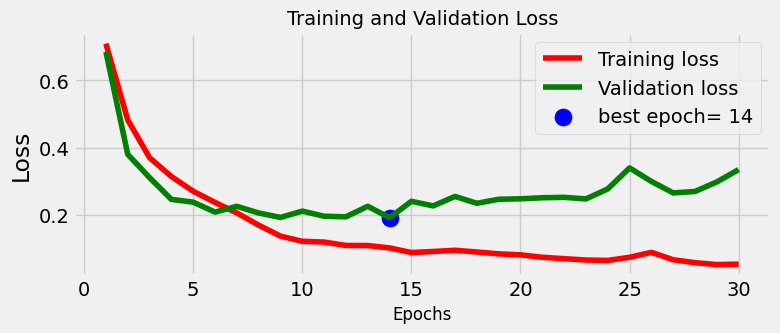

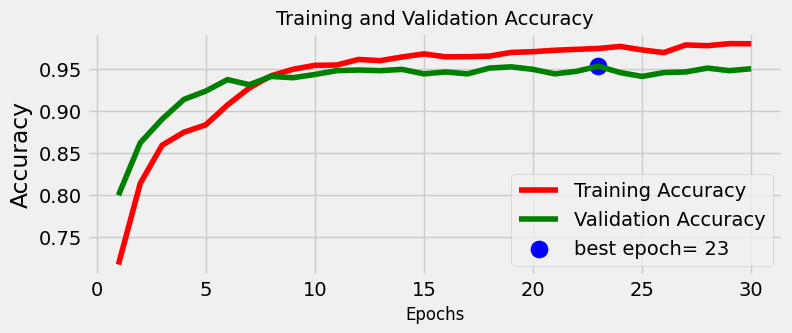

In [35]:
plot_loss_and_accuracy(history2)

In [48]:
tr_eval = model2.evaluate(train_gen)
tr_loss = tr_eval[0]
tr_acc = tr_eval[1]

test_eval = model2.evaluate(test_gen)
test_loss = test_eval[0]
test_acc = test_eval[1]

# define new model details
new_model_details = {
    'Model_Name': 'model2', 
    'no_of_conv_layers': 1, 
    'max_no_of_filters': 10,
    'no_of_dense_layers': 2, 
    'no_of_neurons_at_first_dense': 16, 
    'drop_out': 0.2,
    'learning_rate': 0.0001, 
    'epochs': 30, 
    'tr_loss': tr_loss, 
    'test_loss': test_loss,
    'tr_acc': tr_acc,
    'test_acc': test_acc
}

new_model_details = pd.DataFrame([new_model_details])

# Append the new DataFrame to the existing one using pd.concat
models_details = pd.concat([models_details, new_model_details], ignore_index=True)


models_details

357/357 ━━━━━━━━━━━━━━━━━━━━ 14s 38ms/step - accuracy: 0.9994 - loss: 0.0039
164/164 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9784 - loss: 0.1522


,Model_Name,no_of_conv_layers,max_no_of_filters,no_of_dense_layers,no_of_neurons_at_first_dense,drop_out,learning_rate,epochs,tr_loss,test_loss,tr_acc,test_acc
0,model,1,10,2,16,0.2,0.0010,20,0.461286,0.799728,0.853116,0.79405
1,model2,1,10,2,16,0.2,0.0001,30,0.002397,0.334240,0.999825,0.95042


In [45]:
model3 = Sequential([
    Conv2D(5, kernel_size=(3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D((2,2)),
    
    Flatten(),
    BatchNormalization(),
    
    Dense(16, activation='relu'),
    Dropout(0.4),
    
    Dense(8, activation='relu'),
    Dense(4, activation='softmax')
])

model3.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
model3.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 5)    │           140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 5)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 61605)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 61605)          │       246,420 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 16)             │       985,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 4)              │            36 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,232,428 (4.70 MB)

 Trainable params: 1,109,218 (4.23 MB)

 Non-trainable params: 123,210 (481.29 KB)

In [46]:
history3 = model3.fit(train_gen, epochs=30, validation_data=test_gen, verbose=0)

2024-07-14 15:52:22.092247: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 147859: 4.48483, expected 3.84251
2024-07-14 15:52:22.092314: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 147863: 4.78173, expected 4.13942
2024-07-14 15:52:22.092324: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 147901: 5.06192, expected 4.4196
2024-07-14 15:52:22.092333: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 147914: 4.96247, expected 4.32015
2024-07-14 15:52:22.092341: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 147916: 5.25449, expected 4.61217
2024-07-14 15:52:22.092349: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 147917: 5.32373, expected 4.68141
2024-07-14 15:52:22.092357: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 147918: 4.41711, expected 3.77479
2024-07-14 15:52:22.0

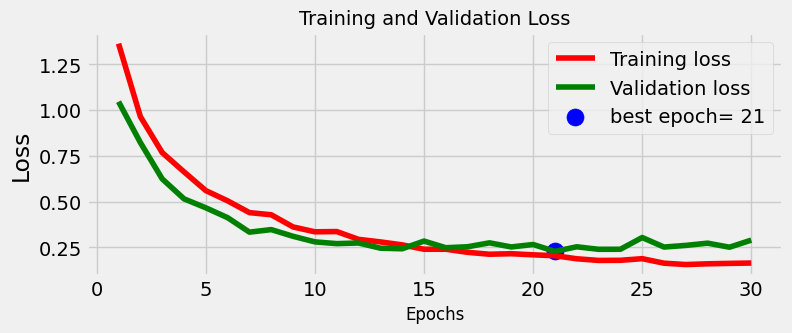

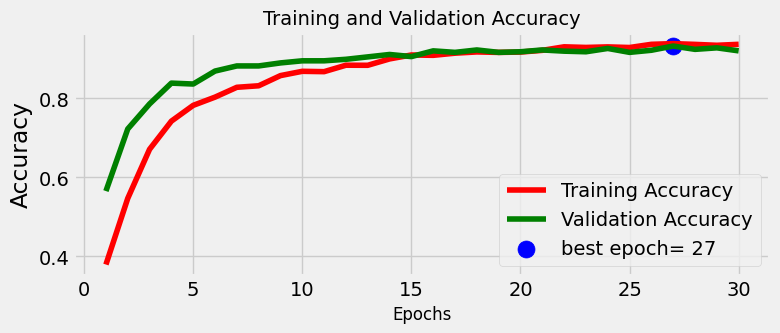

In [49]:
plot_loss_and_accuracy(history3)

In [50]:
tr_eval = model3.evaluate(train_gen)
tr_loss = tr_eval[0]
tr_acc = tr_eval[1]

test_eval = model3.evaluate(test_gen)
test_loss = test_eval[0]
test_acc = test_eval[1]

# define new model details
new_model_details = {
    'Model_Name': 'model3', 
    'no_of_conv_layers': 1, 
    'max_no_of_filters': 5,
    'no_of_dense_layers': 2, 
    'no_of_neurons_at_first_dense': 16, 
    'drop_out': 0.4,
    'learning_rate': 0.0001, 
    'epochs': 30, 
    'tr_loss': tr_loss, 
    'test_loss': test_loss,
    'tr_acc': tr_acc,
    'test_acc': test_acc
}

new_model_details = pd.DataFrame([new_model_details])

# Append the new DataFrame to the existing one using pd.concat
models_details = pd.concat([models_details, new_model_details], ignore_index=True)


models_details

357/357 ━━━━━━━━━━━━━━━━━━━━ 14s 38ms/step - accuracy: 0.9938 - loss: 0.0172
164/164 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9703 - loss: 0.1226


,Model_Name,no_of_conv_layers,max_no_of_filters,no_of_dense_layers,no_of_neurons_at_first_dense,drop_out,learning_rate,epochs,tr_loss,test_loss,tr_acc,test_acc
0,model,1,10,2,16,0.2,0.0010,20,0.461286,0.799728,0.853116,0.794050
1,model2,1,10,2,16,0.2,0.0001,30,0.002397,0.334240,0.999825,0.950420
2,model3,1,5,2,16,0.4,0.0001,30,0.020767,0.289276,0.992647,0.919908


In [51]:
model4 = Sequential([
    Conv2D(10, kernel_size=(3,3), activation='relu', input_shape=(224,224,3), padding='same'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    BatchNormalization(),
    
    Dense(16, activation='relu'),
    Dropout(0.5),
    
    Dense(8, activation='relu'),
    Dense(4, activation='softmax')
])

model4.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
model4.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 224, 224, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 112, 112, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 125440)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 125440)         │       501,760 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 16)             │     2,007,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 4)              │            36 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,509,268 (9.57 MB)

 Trainable params: 2,258,388 (8.62 MB)

 Non-trainable params: 250,880 (980.00 KB)

In [52]:
history4 = model4.fit(train_gen, epochs=40, validation_data=test_gen, verbose=0)

2024-07-14 16:03:51.232703: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 4.29355, expected 3.37692
2024-07-14 16:03:51.232764: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 6.03887, expected 5.12225
2024-07-14 16:03:51.232774: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 5.96359, expected 5.04697
2024-07-14 16:03:51.232782: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 6.12314, expected 5.20652
2024-07-14 16:03:51.232790: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 5.83755, expected 4.92093
2024-07-14 16:03:51.232798: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 5.62587, expected 4.70924
2024-07-14 16:03:51.232805: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 5.52922, expected 4.61259
2024-07-14 16:03:51.232813: E external/local_xla/xla/se

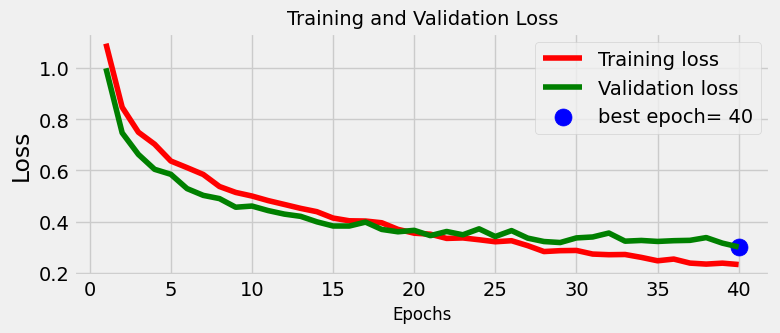

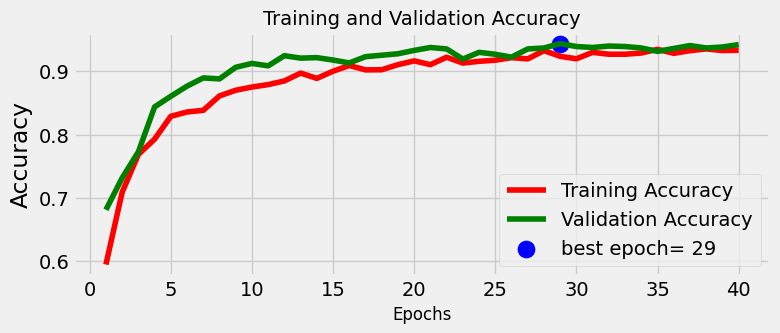

In [53]:
plot_loss_and_accuracy(history4)

In [54]:
tr_eval = model4.evaluate(train_gen)
tr_loss = tr_eval[0]
tr_acc = tr_eval[1]

test_eval = model4.evaluate(test_gen)
test_loss = test_eval[0]
test_acc = test_eval[1]

# define new model details
new_model_details = {
    'Model_Name': 'model4 with padding', 
    'no_of_conv_layers': 1, 
    'max_no_of_filters': 10,
    'no_of_dense_layers': 2, 
    'no_of_neurons_at_first_dense': 16, 
    'drop_out': 0.5,
    'learning_rate': 0.0001, 
    'epochs': 40, 
    'tr_loss': tr_loss, 
    'test_loss': test_loss,
    'tr_acc': tr_acc,
    'test_acc': test_acc
}

new_model_details = pd.DataFrame([new_model_details])

# Append the new DataFrame to the existing one using pd.concat
models_details = pd.concat([models_details, new_model_details], ignore_index=True)


models_details

357/357 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - accuracy: 0.9951 - loss: 0.0859
164/164 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9713 - loss: 0.1442


,Model_Name,no_of_conv_layers,max_no_of_filters,no_of_dense_layers,no_of_neurons_at_first_dense,drop_out,learning_rate,epochs,tr_loss,test_loss,tr_acc,test_acc
0,model,1,10,2,16,0.2,0.0010,20,0.461286,0.799728,0.853116,0.794050
1,model2,1,10,2,16,0.2,0.0001,30,0.002397,0.334240,0.999825,0.950420
2,model3,1,5,2,16,0.4,0.0001,30,0.020767,0.289276,0.992647,0.919908
3,model4 with padding,1,10,2,16,0.5,0.0001,40,0.085555,0.300646,0.995973,0.942029


## The END!